<a href="https://colab.research.google.com/github/cactus1386/AI-WebScrapper/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/lfw-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lfw-dataset


In [3]:
img1 = '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/AJ_Cook/AJ_Cook_0001.jpg'
img2 = '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Aaron_Pena/Aaron_Pena_0001.jpg'

In [31]:
def preprocess_image(image_path, target_size=(160, 160)):
    img = cv2.imread(image_path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    enhanced_bgr = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

    bright = cv2.convertScaleAbs(enhanced_bgr, alpha=1.1, beta=10)

    result = cv2.resize(bright, target_size, interpolation=cv2.INTER_LINEAR)

    return result


In [4]:
def preprocess(img, size=(160, 160)):
    img = cv2.imread(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    equalizer = cv2.equalizeHist(blur)

    bgr = cv2.cvtColor(equalizer, cv2.COLOR_GRAY2BGR)
    result = cv2.resize(bgr, size)

    return result

In [6]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=eb500f586f88a942084f297014d54f3827bfe4e8cdd14d725dd1db43acecd72a
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [15]:
import cv2
import numpy as np
from deepface import DeepFace

def preprocess2(img, size=(160, 160), padding=20):
    image = cv2.imread(img)

    faces = DeepFace.extract_faces(img_path=img, enforce_detection=True)
    facial_area = faces[0]["facial_area"]

    x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
    height, width = image.shape[:2]

    x1 = max(0, x - padding)
    y1 = max(0, y - padding)
    x2 = min(width, x + w + padding)
    y2 = min(height, y + h + padding)

    face_img = image[y1:y2, x1:x2]
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))


    enhanced = clahe.apply(gray)
    enhanced_bgr = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

    bright = cv2.convertScaleAbs(enhanced_bgr, alpha=1.2, beta=10)
    result = cv2.resize(bright, size, interpolation=cv2.INTER_LINEAR)

    return result

In [ ]:
def main_preprocess(img, size=(160, 160)):
  image = cv2.imread(img)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

  enhanced = clahe.apply(gray)
  enhanced_bgr = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

  bright = cv2.convertScaleAbs(enhanced_bgr, alpha=1.2, beta=10)
  result = cv2.resize(bright, size, interpolation=cv2.INTER_LINEAR)

array([[[10, 10, 10],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  9,  9],
        [ 7,  7,  7],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  9,  9],
        [ 6,  6,  6],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
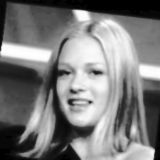

In [16]:
out1_1 = preprocess(img1)
out1_1

array([[[24, 24, 24],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[16, 16, 16],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [16, 16, 16],
        [13, 13, 13],
        [13, 13, 13]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [26, 26, 26],
        [13, 13, 13],
        [13, 13, 13]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)
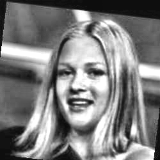

In [32]:
out1_2 = preprocess_image(img1, (160, 160))
out1_2

array([[[20, 20, 20],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[15, 15, 15],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       ...,

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [15, 15, 15],
        [13, 13, 13],
        [13, 13, 13]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [23, 23, 23],
        [13, 13, 13],
        [13, 13, 13]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)
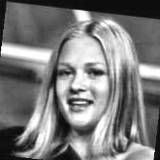

In [30]:
out1_2 = preprocess_image(img1, (160, 160))
out1_2

array([[[21, 21, 21],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[16, 16, 16],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [16, 16, 16],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [24, 24, 24],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)
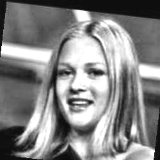

In [18]:
out1_3 = preprocess2(img1)
out1_3

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
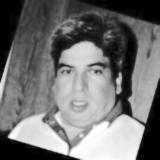

In [19]:
out2_1 = preprocess(img2)
out2_1

Saved preprocessed image to 


array([[[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)
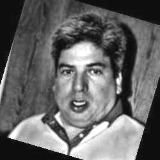

In [20]:
out2_2 = preprocess_image(img2,'', (160, 160))
out2_2

array([[[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)
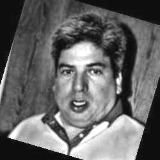

In [21]:
out2_3 = preprocess2(img2,)
out2_3